<a href="https://colab.research.google.com/github/MaxCojocari/Py_labs/blob/main/sktime_experiments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#https://github.com/alan-turing-institute/sktime/blob/main/examples/01_forecasting.ipynb
import numpy as np
import pandas as pd

In [ ]:
!pip install sktime[all_extras]

In [ ]:
from sktime.datasets import load_airline
from sktime.utils.plotting import plot_series

(<Figure size 1152x288 with 1 Axes>,
 <AxesSubplot:ylabel='Number of airline passengers'>)

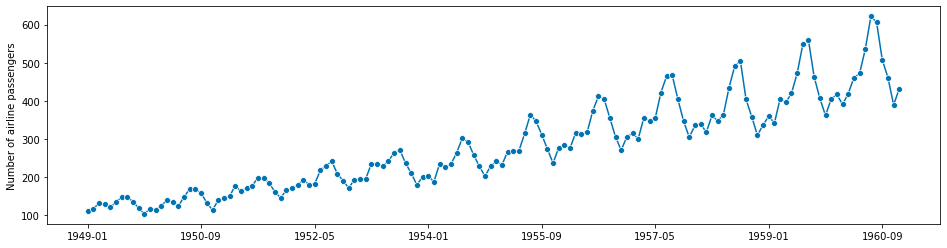

In [ ]:
y = load_airline()

# plotting for visualization
plot_series(y)

In [ ]:
y.index

PeriodIndex(['1949-01', '1949-02', '1949-03', '1949-04', '1949-05', '1949-06',
             '1949-07', '1949-08', '1949-09', '1949-10',
             ...
             '1960-03', '1960-04', '1960-05', '1960-06', '1960-07', '1960-08',
             '1960-09', '1960-10', '1960-11', '1960-12'],
            dtype='period[M]', length=144)

In [ ]:
fh = np.arange(1, 37)
fh

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36])

In [ ]:
from sktime.forecasting.base import ForecastingHorizon
fh = ForecastingHorizon(
    pd.PeriodIndex(pd.date_range("1961-01", periods=36, freq="M")), is_relative=False
)
fh

ForecastingHorizon(['1961-01', '1961-02', '1961-03', '1961-04', '1961-05', '1961-06',
             '1961-07', '1961-08', '1961-09', '1961-10', '1961-11', '1961-12',
             '1962-01', '1962-02', '1962-03', '1962-04', '1962-05', '1962-06',
             '1962-07', '1962-08', '1962-09', '1962-10', '1962-11', '1962-12',
             '1963-01', '1963-02', '1963-03', '1963-04', '1963-05', '1963-06',
             '1963-07', '1963-08', '1963-09', '1963-10', '1963-11', '1963-12'],
            dtype='period[M]', is_relative=False)

In [ ]:
cutoff = pd.Period("1960-12", freq="M")
fh.to_relative(cutoff)
fh.to_absolute(cutoff)

ForecastingHorizon(['1961-01', '1961-02', '1961-03', '1961-04', '1961-05', '1961-06',
             '1961-07', '1961-08', '1961-09', '1961-10', '1961-11', '1961-12',
             '1962-01', '1962-02', '1962-03', '1962-04', '1962-05', '1962-06',
             '1962-07', '1962-08', '1962-09', '1962-10', '1962-11', '1962-12',
             '1963-01', '1963-02', '1963-03', '1963-04', '1963-05', '1963-06',
             '1963-07', '1963-08', '1963-09', '1963-10', '1963-11', '1963-12'],
            dtype='period[M]', is_relative=False)

In [ ]:
from sktime.forecasting.naive import NaiveForecaster

In [ ]:
forecaster = NaiveForecaster(strategy="last")

In [ ]:
forecaster.fit(y)

NaiveForecaster()

(<Figure size 1152x288 with 1 Axes>,
 <AxesSubplot:ylabel='Number of airline passengers'>)

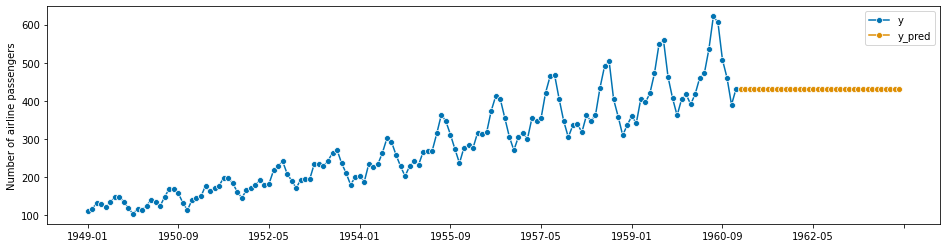

In [ ]:
y_pred = forecaster.predict(fh)
# plotting predictions and past data
plot_series(y, y_pred, labels=["y", "y_pred"])

In [ ]:
from sktime.datasets import load_airline, load_italy_power_demand, load_osuleaf
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.naive import NaiveForecaster

(<Figure size 1152x288 with 1 Axes>,
 <AxesSubplot:ylabel='Number of airline passengers'>)

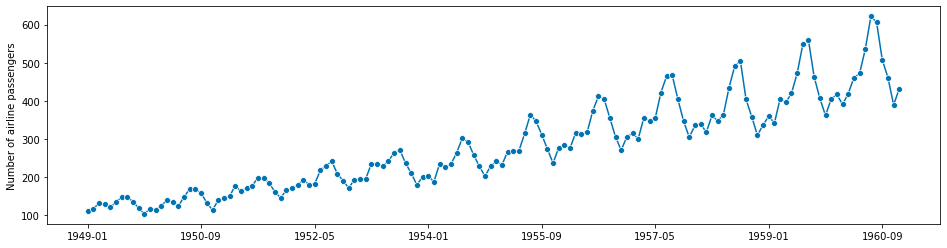

In [ ]:
y = load_airline()
plot_series(y)

In [ ]:
# step 1: data specification
y = load_airline()

# step 2: specifying forecasting horizon
fh = np.arange(1, 37)

# step 3: specifying the forecasting algorithm
forecaster = NaiveForecaster(strategy="last", sp=12)

# step 4: fitting the forecaster
forecaster.fit(y)

# step 5: querying predictions
y_pred = forecaster.predict(fh)

(<Figure size 1152x288 with 1 Axes>,
 <AxesSubplot:ylabel='Number of airline passengers'>)

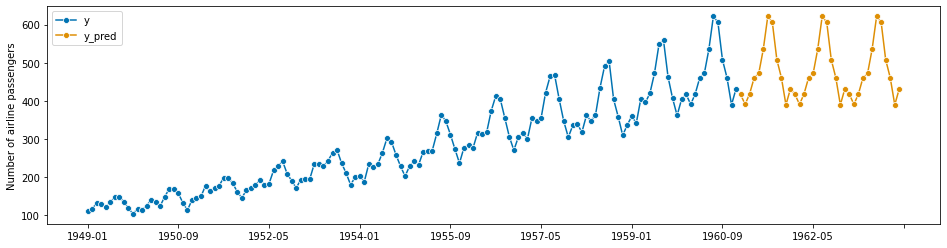

In [ ]:
# optional: plotting predictions and past data
plot_series(y, y_pred, labels=["y", "y_pred"])

In [ ]:
#situation when forecasters can make use of exogeneous data, i.e suplimentary data which is not used in forecasting,
#but helps forecasting y

# step 1: data specification
y = load_airline()
# we create some dummy exogeneous data
X = pd.DataFrame(index=y.index)

# step 2: specifying forecasting horizon
fh = np.arange(1, 37)

# step 3: specifying the forecasting algorithm
forecaster = NaiveForecaster(strategy="last", sp=12)

# step 4: fitting the forecaster
forecaster.fit(y, X=X, fh=fh)

# step 5: querying predictions
y_pred = forecaster.predict(X=X)

(<Figure size 1152x288 with 1 Axes>,
 <AxesSubplot:ylabel='Number of airline passengers'>)

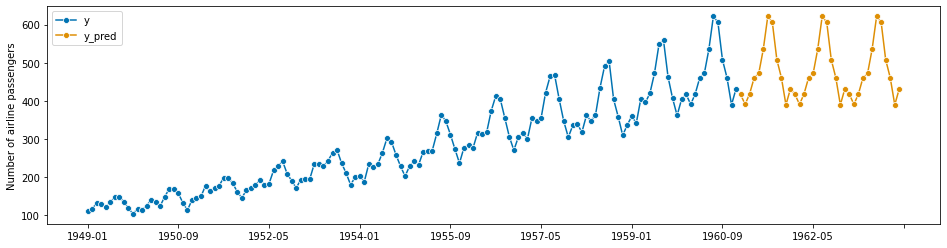

In [ ]:
# plotting predictions and past data
plot_series(y, y_pred, labels=["y", "y_pred"])

In [ ]:
#discovering prediction intervals
from sktime.forecasting.theta import ThetaForecaster

In [ ]:
# simple workflow
y = load_airline()
fh = np.arange(1, 13)

forecaster = ThetaForecaster(sp=12)
forecaster.fit(y)


forecaster.fit(y, fh=fh)

y_pred = forecaster.predict(fh)

(<Figure size 1152x288 with 1 Axes>,
 <AxesSubplot:ylabel='Number of airline passengers'>)

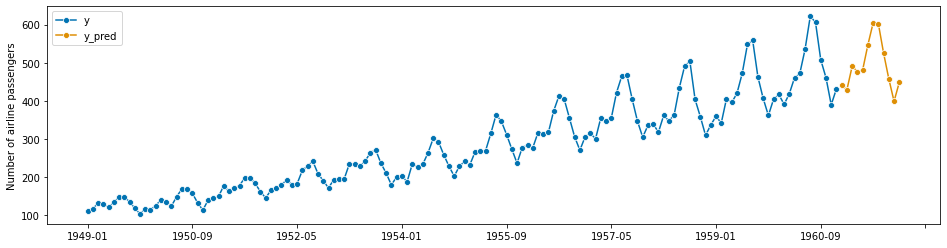

In [ ]:
plot_series(y, y_pred, labels=["y", "y_pred"])

In [ ]:
# setting return_pred_int argument to True; alpha determines percentiles
#  intervals are lower = alpha/2-percentile, upper = (1-alpha/2)-percentile
alpha = 0.05  # 2.5%/97.5% prediction intervals
y_pred, y_pred_ints = forecaster.predict(fh, return_pred_int=True, alpha=alpha)

In [ ]:
y_pred_ints

,lower,upper
1961-01,440.404172,442.157901
1961-02,428.509834,430.594102
1961-03,489.853741,492.222872
1961-04,475.682641,478.305882
1961-05,479.539843,482.394664
1961-06,545.302288,548.371264
1961-07,602.738297,606.007429
1961-08,600.983983,604.441704
1961-09,523.534633,527.171176
1961-10,455.941736,459.748710


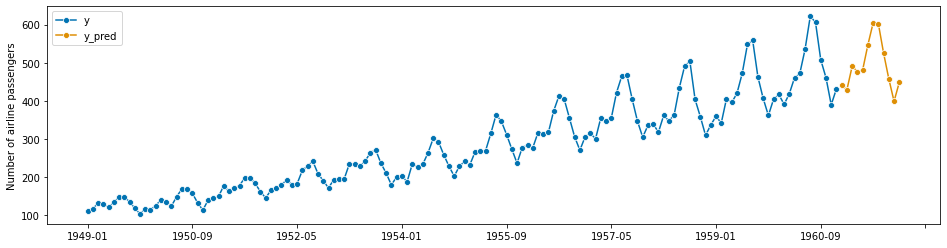

In [ ]:
fig, ax = plot_series(y, y_pred, labels=["y", "y_pred"])

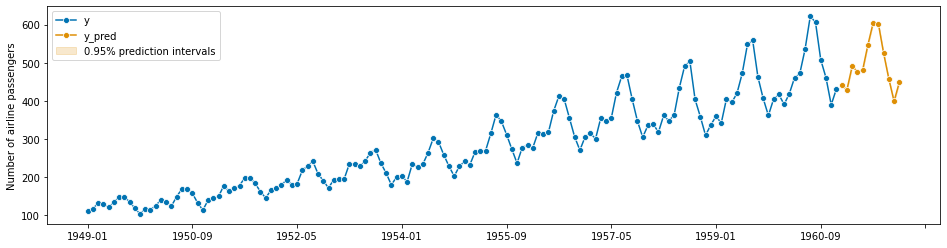

In [ ]:
fig, ax = plot_series(y, y_pred, labels=["y", "y_pred"])
ax.fill_between(
    ax.get_lines()[-1].get_xdata(),
    y_pred_ints["lower"],
    y_pred_ints["upper"],
    alpha=0.2,
    color=ax.get_lines()[-1].get_c(),
    label=f"{1 - alpha}% prediction intervals",
)
ax.legend();

In [ ]:
# step 1 - splitting a historical data set in to a temporal train and test batch
from sktime.forecasting.model_selection import temporal_train_test_split

In [ ]:
y = load_airline()
y_train, y_test = temporal_train_test_split(y, test_size=36)
# we will try to forecast y_test from y_train

108 36


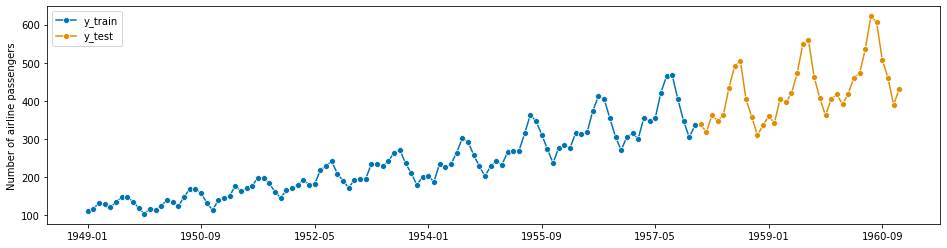

In [ ]:
# plotting for illustration
plot_series(y_train, y_test, labels=["y_train", "y_test"])
print(y_train.shape[0], y_test.shape[0])

In [ ]:
# step 2 - making forecasts for y_test from y_train

# we can simply take the indices from `y_test` where they already are stored
fh = ForecastingHorizon(y_test.index, is_relative=False)

forecaster = NaiveForecaster(strategy="last", sp=12)

forecaster.fit(y_train)

# y_pred will contain the predictions
y_pred = forecaster.predict(fh)

(<Figure size 1152x288 with 1 Axes>,
 <AxesSubplot:ylabel='Number of airline passengers'>)

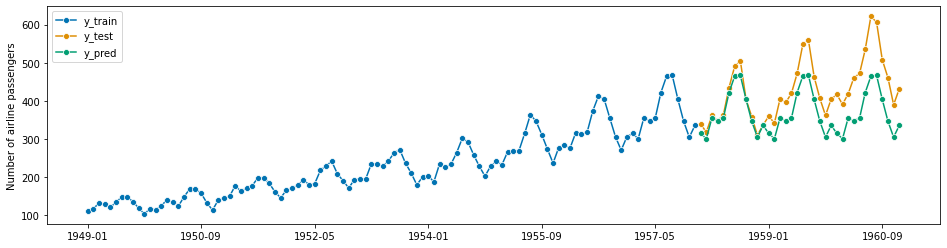

In [ ]:
# plotting for illustration
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])

In [ ]:
#steps 3 and 4 - specifying a forecasting metric, evaluating on the test set
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error

In [ ]:
# option 1: using the lean function interface
mean_absolute_percentage_error(y_test, y_pred)
# note: the FIRST argument is the ground truth, the SECOND argument are the forecasts
#       the order matters for most metrics in general

0.145427686270316

In [ ]:
from sktime.performance_metrics.forecasting import MeanAbsolutePercentageError
# option 2: using the composable class interface
mape = MeanAbsolutePercentageError(symmetric=False)
# the class interface allows to easily construct variants of the MAPE
#  e.g., the non-symmetric verion
# it also allows for inspection of metric properties
#  e.g., are higher values better (answer: no)?
mape.greater_is_better
# evaluation works exactly like in option 2, but with the instantiated object
mape(y_test, y_pred)

0.13189432350948402

In [ ]:
#Summary: the basic batch forecast evaluation workflow in a nutshell - function metric interface
from sktime.datasets import load_airline
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.forecasting.naive import NaiveForecaster
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error
# step 1: splitting historical data
y = load_airline()
y_train, y_test = temporal_train_test_split(y, test_size=36)

# step 2: running the basic forecasting workflow
fh = ForecastingHorizon(y_test.index, is_relative=False)
forecaster = NaiveForecaster(strategy="last", sp=12)
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)

# step 3: specifying the evaluation metric and
# step 4: computing the forecast performance
mean_absolute_percentage_error(y_test, y_pred)

# step 5: testing forecast performance against baseline
# under development


#similarly for MeanAbsolutePercentageError

0.145427686270316

In [ ]:
#1.4.1 updating a forecaster with the update method
#Example: suppose that, in the airline example, we want to make forecasts a year ahead, 
#but every month, starting December 1957. The first few months, forecasts would be made as follows:

from sktime.datasets import load_airline
from sktime.forecasting.ets import AutoETS
from sktime.utils.plotting import plot_series

In [ ]:
# we prepare the full data set for convenience
# note that in the scenario we will "know" only part of this at certain time points
y = load_airline()

(<Figure size 1152x288 with 1 Axes>,
 <AxesSubplot:ylabel='Number of airline passengers'>)

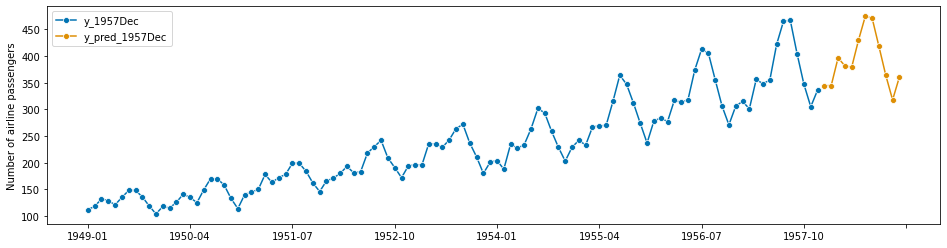

In [ ]:
# December 1957

# this is the data known in December 1957
y_1957Dec = y[:-36]

# step 1: specifying the forecasting strategy
forecaster = AutoETS(auto=True, sp=12, n_jobs=-1)

# step 2: specifying the forecasting horizon: one year ahead, all months
fh = np.arange(1, 13)

# step 3: this is the first time we use the model, so we fit it
forecaster.fit(y_1957Dec)

# step 4: obtaining the first batch of forecasts for Jan 1958 - Dec 1958
y_pred_1957Dec = forecaster.predict(fh)
# plotting predictions and past data
plot_series(y_1957Dec, y_pred_1957Dec, labels=["y_1957Dec", "y_pred_1957Dec"])

In [ ]:
# January 1958

# new data is observed:
y_1958Jan = y[[-36]]

# step 5: we update the forecaster with the new data
forecaster.update(y_1958Jan)

# step 6: making forecasts with the updated data
y_pred_1958Jan = forecaster.predict(fh)

# note that the fh is relative, so forecasts are automatically for 1 month later
#  i.e., from Feb 1958 to Jan 1959
y_pred_1958Jan

/usr/local/lib/python3.7/dist-packages/sktime/forecasting/base/_base.py:1254: UserWarning: NotImplementedWarning: AutoETS does not have a custom `update` method implemented. AutoETS will be refit each time `update` is called.
  f"NotImplementedWarning: {self.__class__.__name__} "


1958-02    341.518092
1958-03    392.852642
1958-04    378.524976
1958-05    375.665178
1958-06    426.013948
1958-07    470.580314
1958-08    467.113014
1958-09    414.462982
1958-10    360.966402
1958-11    315.211953
1958-12    357.906992
1959-01    363.041653
Freq: M, dtype: float64

(<Figure size 1152x288 with 1 Axes>,
 <AxesSubplot:ylabel='Number of airline passengers'>)

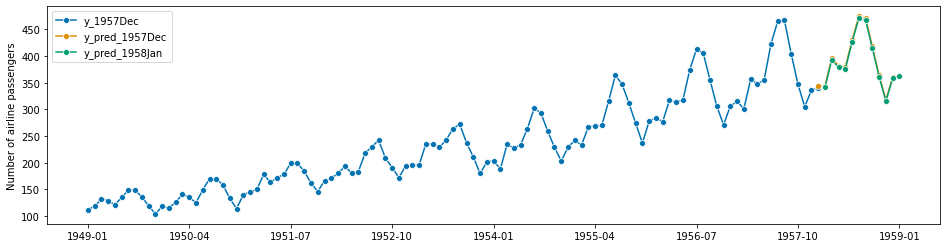

In [ ]:
# plotting predictions and past data
plot_series(
    y[:-35],
    y_pred_1957Dec,
    y_pred_1958Jan,
    labels=["y_1957Dec", "y_pred_1957Dec", "y_pred_1958Jan"],
)

In [ ]:
# advanced evaluation worfklow: rolling re-sampling and aggregate errors, rolling back-testing
from sktime.forecasting.arima import AutoARIMA
from sktime.forecasting.model_evaluation import evaluate
from sktime.forecasting.model_selection import ExpandingWindowSplitter

In [ ]:
forecaster = AutoARIMA(sp=12, suppress_warnings=True)

cv = ExpandingWindowSplitter(
    step_length=12, fh=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], initial_window=72
)

df = evaluate(forecaster=forecaster, y=y, cv=cv, strategy="refit", return_data=True)

df.iloc[:, :5]

,test_MeanAbsolutePercentageError,fit_time,pred_time,len_train_window,cutoff
0,0.064381,7.150970,0.013449,72,1954-12
1,0.051731,12.503638,0.010472,84,1955-12
2,0.030455,20.301338,0.008541,96,1956-12
3,0.052028,4.309948,0.007472,108,1957-12
4,0.076921,6.576992,0.008887,120,1958-12
5,0.030936,14.669458,0.009164,132,1959-12


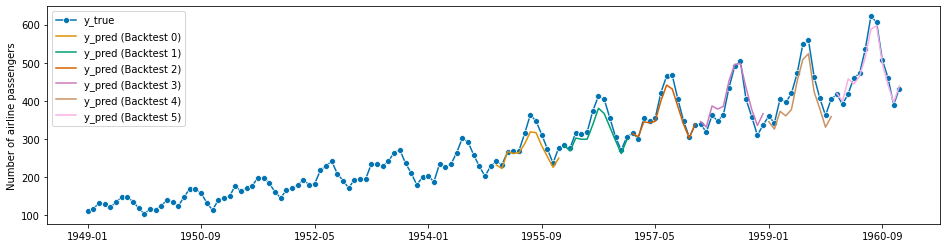

In [ ]:
# visualization of a forecaster evaluation
fig, ax = plot_series(
    y,
    df["y_pred"].iloc[0],
    df["y_pred"].iloc[1],
    df["y_pred"].iloc[2],
    df["y_pred"].iloc[3],
    df["y_pred"].iloc[4],
    df["y_pred"].iloc[5],
    markers=["o", "", "", "", "", "", ""],
    labels=["y_true"] + ["y_pred (Backtest " + str(x) + ")" for x in range(6)],
)
ax.legend();

In [ ]:
# Forecasters in sktime - main families

from sktime.registry import all_estimators
import pandas as pd

In [ ]:
# all_estimators returns list of pairs - data frame conversion for pretty printing
all_estimators("forecaster", as_dataframe=True)

Importing the dtw module. When using in academic works please cite:
  T. Giorgino. Computing and Visualizing Dynamic Time Warping Alignments in R: The dtw Package.
  J. Stat. Soft., doi:10.18637/jss.v031.i07.



,name,estimator
0,ARIMA,<class 'sktime.forecasting.arima.ARIMA'>
1,AutoARIMA,<class 'sktime.forecasting.arima.AutoARIMA'>
2,AutoETS,<class 'sktime.forecasting.ets.AutoETS'>
3,AutoEnsembleForecaster,<class 'sktime.forecasting.compose._ensemble.A...
4,BATS,<class 'sktime.forecasting.bats.BATS'>
5,ColumnEnsembleForecaster,<class 'sktime.forecasting.compose._column_ens...
6,Croston,<class 'sktime.forecasting.croston.Croston'>
7,DirRecTabularRegressionForecaster,<class 'sktime.forecasting.compose._reduce.Dir...
8,DirRecTimeSeriesRegressionForecaster,<class 'sktime.forecasting.compose._reduce.Dir...
9,DirectTabularRegressionForecaster,<class 'sktime.forecasting.compose._reduce.Dir...


In [ ]:
# imports necessary for this chapter
from sktime.datasets import load_airline
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error
from sktime.utils.plotting import plot_series

# data loading for illustration (see section 1 for explanation)
y = load_airline()
y_train, y_test = temporal_train_test_split(y, test_size=36)
fh = ForecastingHorizon(y_test.index, is_relative=False)

0.05027662159649058

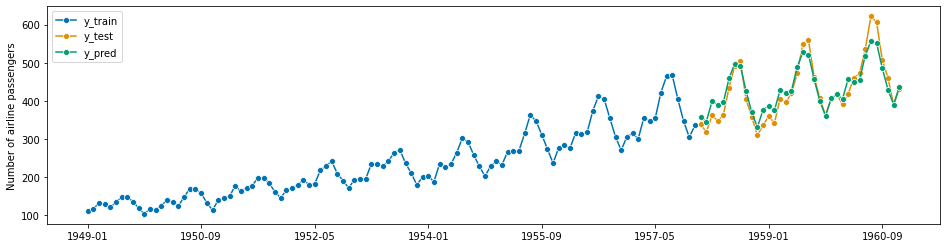

In [ ]:
#exponential smoothing algorithm

from sktime.forecasting.exp_smoothing import ExponentialSmoothing
forecaster = ExponentialSmoothing(trend="add", seasonal="additive", sp=12)

forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
mean_absolute_percentage_error(y_pred, y_test)

0.0631640040619606

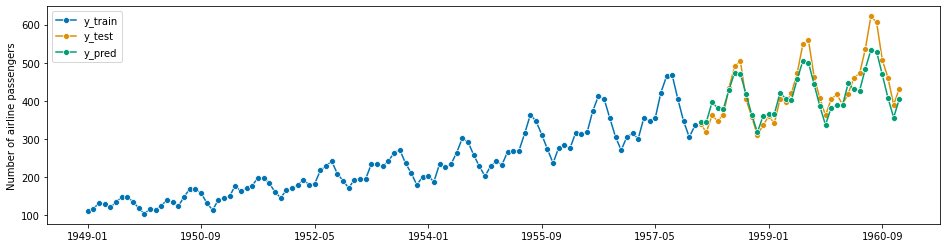

In [ ]:
#AutoETS
from sktime.forecasting.ets import AutoETS
forecaster = AutoETS(auto=True, sp=12, n_jobs=-1)

forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
mean_absolute_percentage_error(y_pred, y_test)

0.08661467619871827

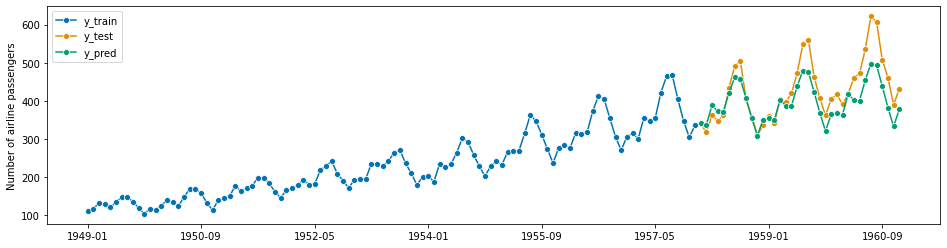

In [ ]:
# theta forecaster
from sktime.datasets import load_airline
from sktime.forecasting.theta import ThetaForecaster
y = load_airline()
forecaster = ThetaForecaster(sp=12)


forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
mean_absolute_percentage_error(y_pred, y_test)

0.04257105757347649

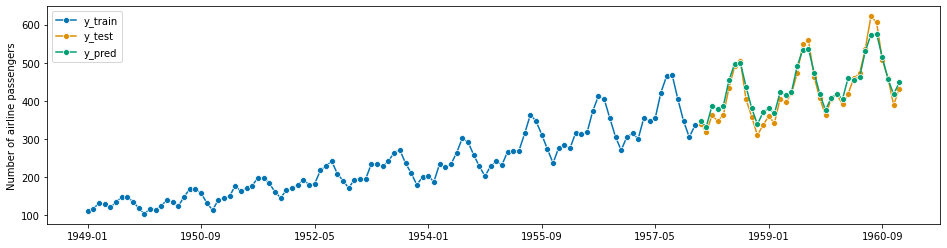

In [ ]:
#ARIMA
from sktime.forecasting.arima import ARIMA
forecaster = ARIMA(
    order=(1, 1, 0), seasonal_order=(0, 1, 0, 12), suppress_warnings=True
)

forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
mean_absolute_percentage_error(y_pred, y_test)

0.04117062367046531

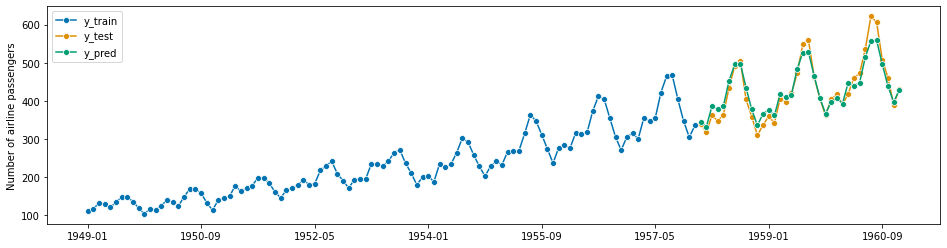

In [ ]:
#AutoARIMA
from sktime.forecasting.arima import AutoARIMA
forecaster = AutoARIMA(sp=12, suppress_warnings=True)

forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
mean_absolute_percentage_error(y_pred, y_test)

In [ ]:
# to obtain the fitted parameters, run
forecaster.get_fitted_params()
# should these not include pdq?

{'aic': 704.0011679025909,
 'aicc': 704.1316026851996,
 'ar.L1': -0.2411177593160947,
 'bic': 709.108921685792,
 'hqic': 706.0650836395923,
 'order': (1, 1, 0),
 'seasonal_order': (0, 1, 0, 12),
 'sigma2': 92.74985957133522}

In [ ]:
#BATS and TBATS
from sktime.forecasting.bats import BATS
from sktime.forecasting.tbats import TBATS
forecaster_BATS = BATS(sp=12, use_trend=True, use_box_cox=False)
forecaster_TBATS = TBATS(sp=12, use_trend=True, use_box_cox=False)

forecaster_BATS.fit(y_train)
forecaster_TBATS.fit(y_train)

TBATS(sp=12, use_box_cox=False, use_trend=True)

0.08689500982369815

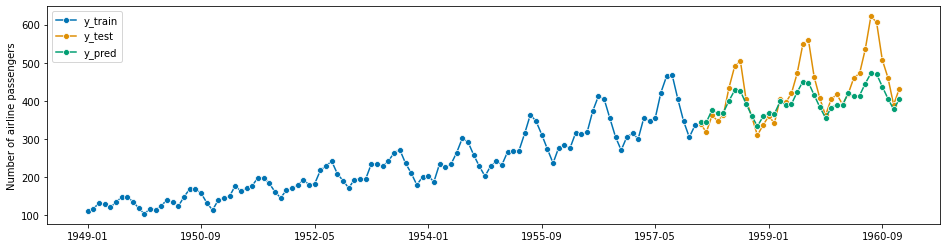

In [ ]:
y_pred = forecaster_BATS.predict(fh)
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
mean_absolute_percentage_error(y_pred, y_test)

0.08493353477049946

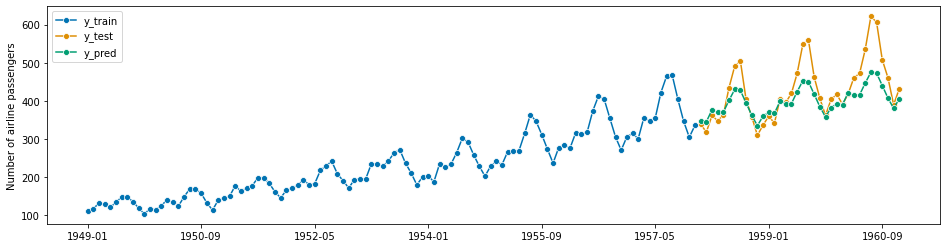

In [ ]:
y_pred = forecaster_TBATS.predict(fh)
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
mean_absolute_percentage_error(y_pred, y_test)

In [ ]:
#Facebook Prophet
from sktime.forecasting.fbprophet import Prophet

In [ ]:
#The current interface does not support period indices, only pd.DatetimeIndex.
#Consider improving this by contributing the sktime.

#Convert index to pd.DatetimeIndex
z = y.copy()
z = z.to_timestamp(freq="M")
z_train, z_test = temporal_train_test_split(z, test_size=36)

/usr/local/lib/python3.7/dist-packages/sktime/forecasting/base/_fh.py:322: FutureWarning: Timestamp.freqstr is deprecated and will be removed in a future version.
  cutoff = _coerce_to_period(cutoff, freq=cutoff.freqstr)


0.06967488737663433

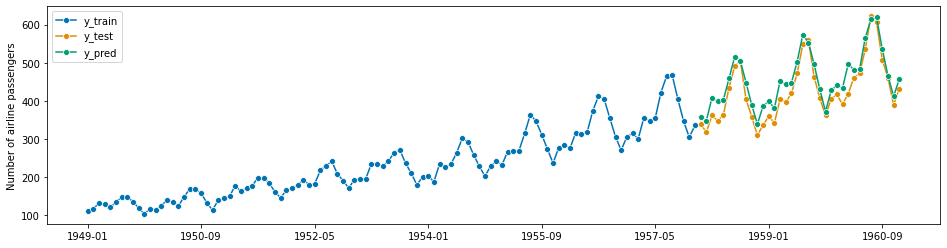

In [ ]:
forecaster = Prophet(
    seasonality_mode="multiplicative",
    n_changepoints=int(len(y_train) / 12),
    add_country_holidays={"country_name": "Germany"},
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False,
)

forecaster.fit(z_train)
y_pred = forecaster.predict(fh.to_relative(cutoff=y_train.index[-1]))
y_pred.index = y_test.index

plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
mean_absolute_percentage_error(y_pred, y_test)

0.048733035008707695

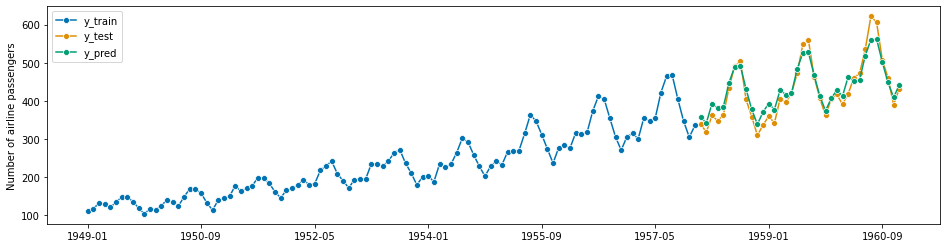

In [ ]:
# State Space Model (Structural Time Series)

from sktime.forecasting.structural import UnobservedComponents
# We can model seasonality using Fourier modes as in the Prophet model.
forecaster = UnobservedComponents(
    level="local linear trend", freq_seasonal=[{"period": 12, "harmonics": 10}]
)

forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
mean_absolute_percentage_error(y_pred, y_test)